# Gene distance plots exploratory data analysis notebook

## What are the gene distance plots?

An attempt to investigate if the precision and recall of variant callers is affected by the distance between samples and references. However here we focus on regions that are common between the samples and the refs, thus we do not address the issues of reference incompleteness (i.e. we don't analyse regions that exclusive to the sample or the ref).

## How do we do this?

We first identify genes that are common between a pair `(sample, ref)`. For `snippy`, `ref` is each 226 references we use. For pandora, `ref` is simply the `pandora_multisample.vcf_ref.fa`. To identify these genes, we need a gene sequence that is as close as possible to the samples/refs. Thus we use the gene sequences in the `pandora_multisample.vcf_ref.fa`. We map the genes in `pandora_multisample.vcf_ref.fa` for each pair `(sample, ref)`, allowing us to know if the gene appears in the sample and its coordinates, in the ref and its coordinates, and the edit distance between them (in case they appear in both sample and ref).

Using the gene coordinates, we can infer how many variant calls lie on each identified gene, and if they are correct or incorrect (using the 4-way pipeline assessment), allowing us to know the precision ratio of the caller in that gene. The same for recall - we know how many truth variants lie on the gene, and how many the caller discovered. We plot these values by bins of genes split by its edit distance between the sample and the refs.

All of this is comprised in a snakemake pipeline, and this EDA notebook analyse the pipeline's output to check what is the best way to convey this data.

In [102]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 5]
def display_full(x):
    pd.set_option('display.max_rows', len(x))
    display(x)
    pd.reset_option('display.max_rows')

# Data input

For each triple `(gene, truth, reference)`, we know the nb of truth variants in that gene (`max_recall`), the nb of truth variants the tool was able to call (`observed_recall`) and thus the recall performance (`recall_ratio = observed_recall / max_recall`). We also know the edit distance of the gene between the ref and the truth (`distance`).

We also have the same stuff for precision.

In [103]:
df_pandora_precision = pd.read_csv("/home/leandro/git/snippy_calls_gene_distance/tmp/evaluating_calls_output_pandora_no_denovo_100x/get_gene_truth_ref_precision_proportion_distance/all_gene_truth_ref_precision_proportion_distance.csv")
df_pandora_precision["tool"] = "pandora"
df_snippy_precision = pd.read_csv("/home/leandro/git/snippy_calls_gene_distance/tmp/evaluating_calls_output_snippy/get_gene_truth_ref_precision_proportion_distance/all_gene_truth_ref_precision_proportion_distance.csv")
df_snippy_precision["tool"] = "snippy"
df_precision = pd.concat([df_pandora_precision, df_snippy_precision], ignore_index = True)
display(df_precision)

df_pandora_recall = pd.read_csv("/home/leandro/git/snippy_calls_gene_distance/tmp/evaluating_calls_output_pandora_no_denovo_100x/get_gene_truth_ref_recall_proportion_distance/all_gene_truth_ref_recall_proportion_distance.csv")
df_pandora_recall["tool"] = "pandora"
df_snippy_recall = pd.read_csv("/home/leandro/git/snippy_calls_gene_distance/tmp/evaluating_calls_output_snippy/get_gene_truth_ref_recall_proportion_distance/all_gene_truth_ref_recall_proportion_distance.csv")
df_snippy_recall["tool"] = "snippy"
df_recall = pd.concat([df_pandora_recall, df_snippy_recall], ignore_index = True)
display(df_recall)

,gene,truth,ref,distance,max_precision,observed_precision,precision_ratio,tool
0,Cluster_0,CFT073,pandora_vcf_ref_no_denovo,0.000000,8,8.000000,1.000000,pandora
1,Cluster_10,CFT073,pandora_vcf_ref_no_denovo,0.002004,3,3.000000,1.000000,pandora
2,Cluster_1001,CFT073,pandora_vcf_ref_no_denovo,0.065375,10,9.961538,0.996154,pandora
3,Cluster_1007,CFT073,pandora_vcf_ref_no_denovo,0.000000,1,1.000000,1.000000,pandora
4,Cluster_1009,CFT073,pandora_vcf_ref_no_denovo,0.002433,15,15.000000,1.000000,pandora
...,...,...,...,...,...,...,...,...
4244218,GC00010497,063_STEC,CP010140.1,0.026144,8,8.000000,1.000000,snippy
4244219,GC00010606,063_STEC,CP010140.1,0.067633,4,4.000000,1.000000,snippy
4244220,GC00010787,063_STEC,CP010140.1,0.020080,4,4.000000,1.000000,snippy
4244221,GC00010870,063_STEC,CP010140.1,0.015152,2,2.000000,1.000000,snippy


,gene,truth,ref,distance,max_recall,observed_recall,recall_ratio,tool
0,Cluster_10028,H131800734,pandora_vcf_ref_no_denovo,0.043478,5,5.0,1.000000,pandora
1,Cluster_10085,H131800734,pandora_vcf_ref_no_denovo,0.013333,6,0.0,0.000000,pandora
2,Cluster_1009,H131800734,pandora_vcf_ref_no_denovo,0.004866,6,5.0,0.833333,pandora
3,Cluster_10093,H131800734,pandora_vcf_ref_no_denovo,0.010989,2,2.0,1.000000,pandora
4,Cluster_10094,H131800734,pandora_vcf_ref_no_denovo,0.021978,5,5.0,1.000000,pandora
...,...,...,...,...,...,...,...,...
9409352,GC00010496,063_STEC,CP010140.1,0.030864,12,8.0,0.666667,snippy
9409353,GC00010497,063_STEC,CP010140.1,0.026144,9,6.0,0.666667,snippy
9409354,GC00010787,063_STEC,CP010140.1,0.020080,5,5.0,1.000000,snippy
9409355,GC00010870,063_STEC,CP010140.1,0.015152,3,3.0,1.000000,snippy


# Main helper functions (please skip, go direct to the Results)

In [104]:
import seaborn as sns
sns.set()
import pandas as pd
import matplotlib.pyplot as plt

def get_bounds(step, max_bin):
    bounds = [0.0]
    current_step = step
    while current_step <= max_bin:
        bounds.append(current_step)
        current_step += step
    assert len(bounds) > 0
    return bounds

def get_edit_distances(row, bounds):
    distance = row["distance"]
    for upper_bound in bounds[1:]:
        if distance < upper_bound:
            return upper_bound
    return bounds[-1]

def get_df_with_edit_distance_labels (df, max_precision_or_recall_column, having_at_least_n_variants, step, max_bin):
    df = df.query(f"{max_precision_or_recall_column} >= @having_at_least_n_variants")
    bounds = get_bounds(step, max_bin)
    edit_distance_labels = df.apply(get_edit_distances, axis=1, bounds=bounds)
    df["edit_distance_labels"] = edit_distance_labels
    return df

def get_df_with_edit_distance_labels_for_precision (df, step, max_bin):
    return get_df_with_edit_distance_labels(df, max_precision_or_recall_column="max_precision",
                                     having_at_least_n_variants=1, step=step, max_bin=max_bin)

def get_df_with_edit_distance_labels_for_recall (df, step, max_bin):
    return get_df_with_edit_distance_labels(df, max_precision_or_recall_column="max_recall",
                                     having_at_least_n_variants=1, step=step, max_bin=max_bin)

def init_plot(figsize=(20, 5)):
    fig, ax = plt.subplots(figsize=figsize)
    return fig, ax

def save_figure(fig, output_filepath):
    fig.savefig(output_filepath, format="png", dpi=600)
    
def plot_lineplot_mean_precision_or_recall_in_genes_in_several_bins(df, recall_or_precision_ratio, step, xlim = 0.25, display_plot=False, display_dfs=False, output_filepath=None):
    fig, ax = init_plot()
    ax.set_xlabel(f"Edit distance (gene bins at each {step * 100}%)")
    ax.set_xlim([0.0, xlim])
    ax.set_ylabel(f'Mean {recall_or_precision_ratio} per bin')
    ax.set_ylim([0.0, 1.05])
    sns.lineplot(x="edit_distance_labels", y=recall_or_precision_ratio, data=df, hue="tool")
    
    if display_plot:
        ax.plot()    
    
    if output_filepath is not None:
        save_figure(fig, output_filepath)
        
    if display_dfs:
        display_full(df.query("tool == 'pandora'")[["tool", "edit_distance_labels", recall_or_precision_ratio]])
        display_full(df.query("tool == 'snippy'")[["tool", "edit_distance_labels", recall_or_precision_ratio]])



def plot_lineplot_mean_precision_in_genes_in_several_bins(df, step, xlim = 0.25, display_plot=False, display_dfs=False, output_filepath=None):
    plot_lineplot_mean_precision_or_recall_in_genes_in_several_bins(df, "precision_ratio", step, xlim, display_plot, display_dfs, output_filepath)

def plot_lineplot_mean_recall_in_genes_in_several_bins(df, step, xlim = 0.25, display_plot=False, display_dfs=False, output_filepath=None):
    plot_lineplot_mean_precision_or_recall_in_genes_in_several_bins(df, "recall_ratio", step, xlim, display_plot, display_dfs, output_filepath)

    
def plot_lineplot_count_in_genes_in_several_bins(count_df, step, display_plot=False, display_dfs=False, output_filepath=None):
    fig, ax = init_plot()
    ax.set_xlabel(f"Edit distance (gene bins at each {step * 100}%)")
    ax.set_xlim([0.0, 0.25])
    ax.set_ylabel("Number of genes per bin")
    sns.lineplot(x="edit_distance_labels", y="gene", data=count_df, hue="tool")
    
    if output_filepath is not None:
        save_figure(fig, output_filepath)
        
    if display_plot:
        ax.plot()
    
    if display_dfs:
        display_full(count_df.query("tool == 'pandora'"))
        display_full(count_df.query("tool == 'snippy'"))

    
    
    
    
def plot_violinplot_precision_or_recall_in_genes_in_several_bins(df, recall_or_precision_ratio, step, scale, output_filepath):
    fig, ax = init_plot()
    sns.violinplot(x="edit_distance_labels", y=recall_or_precision_ratio, data=df, scale=scale)
    ax.set(xlabel=f"Edit distance (gene bins at each {step*100}%)", ylabel=f'{recall_or_precision_ratio} per bin')
    ax.set_ylim([-0.25, 1.25])
    save_figure(fig, output_filepath)

def plot_violinplot_precision_in_genes_in_several_bins(df, step, scale, output_filepath):
    plot_violinplot_precision_or_recall_in_genes_in_several_bins(df, "precision_ratio", step, scale, output_filepath)

def plot_violinplot_recall_in_genes_in_several_bins(df, step, scale, output_filepath):
    plot_violinplot_precision_or_recall_in_genes_in_several_bins(df, "recall_ratio", step, scale, output_filepath)
    
    
    
def get_edit_distance_threshold_where_all_tools_have_at_least_the_min_nb_of_genes(count_df, min_nb_of_genes, nb_of_tools):
    edit_distance_and_nb_of_tools = count_df.query("gene >= @min_nb_of_genes").groupby("edit_distance_labels").count()
    del edit_distance_and_nb_of_tools["gene"]
    edit_distance_threshold_to_use = max(edit_distance_and_nb_of_tools.query("tool == @nb_of_tools").index)
    return edit_distance_threshold_to_use

# Cached dfs for easier processing (please skip, go direct to the Results)

In [105]:
def get_count_df(df):
    count_df = df.groupby(by=["edit_distance_labels", "tool"], as_index=False).count()
    count_df = count_df[["edit_distance_labels", "tool", "gene"]]
    return count_df


df_precision_with_step_001 = get_df_with_edit_distance_labels_for_precision(df_precision, step = 0.01, max_bin = 0.2)
count_df_precision_with_step_001 = get_count_df(df_precision_with_step_001)
df_recall_with_step_001 = get_df_with_edit_distance_labels_for_recall(df_recall, step = 0.01, max_bin = 0.2)
count_df_recall_with_step_001 = get_count_df(df_recall_with_step_001)

# Results



# Precision with 1% bins (full plot):

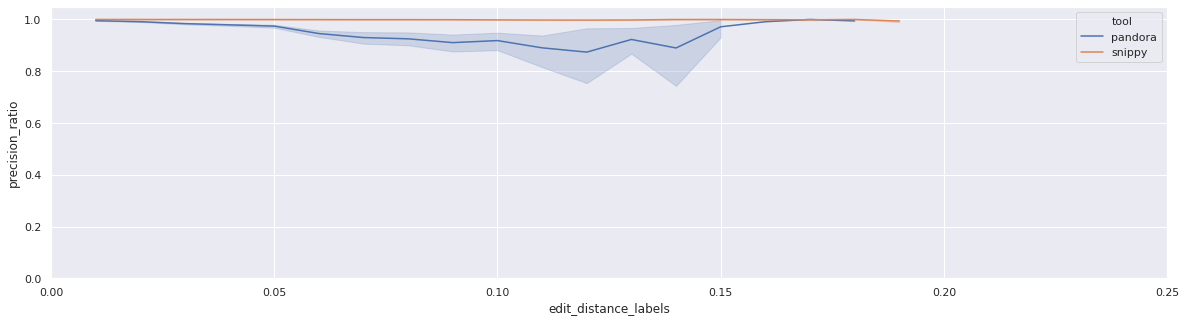

In [106]:
plot_lineplot_mean_precision_in_genes_in_several_bins(df_precision_with_step_001, step=0.01, display_plot=True)

## Number of genes in each bin

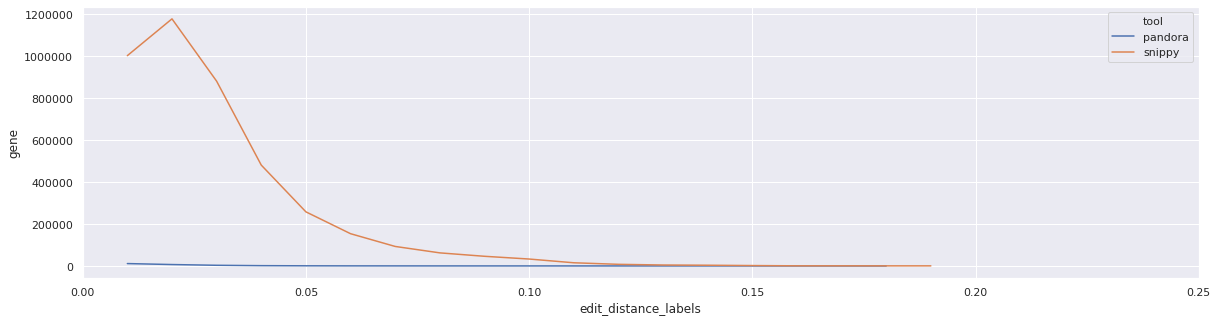

In [107]:
plot_lineplot_count_in_genes_in_several_bins(count_df_precision_with_step_001, step=0.01, display_plot=True)

### Raw counts (for debug)

In [108]:
display(count_df_precision_with_step_001)

,edit_distance_labels,tool,gene
0,0.01,pandora,11315
1,0.01,snippy,1001838
2,0.02,pandora,6670
3,0.02,snippy,1177164
4,0.03,pandora,3160
5,0.03,snippy,880260
6,0.04,pandora,1377
7,0.04,snippy,480468
8,0.05,pandora,678
9,0.05,snippy,257738


## Precision with 1% bins (show only until all tools have >= 50 genes):

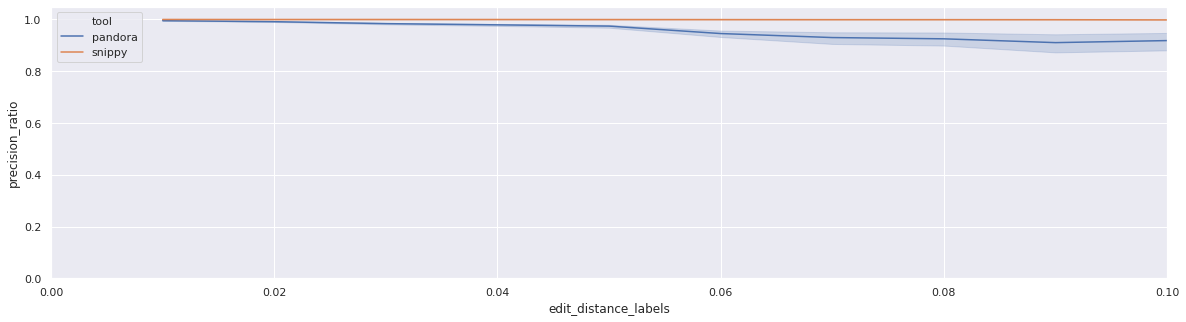

In [109]:
edit_distance_threshold_for_precision_where_all_tools_have_at_least_50_genes = \
    get_edit_distance_threshold_where_all_tools_have_at_least_the_min_nb_of_genes(
        count_df_precision_with_step_001,
        min_nb_of_genes = 50,
        nb_of_tools = 2)

plot_lineplot_mean_precision_in_genes_in_several_bins(
    df_precision_with_step_001.query("edit_distance_labels <= @edit_distance_threshold_for_precision_where_all_tools_have_at_least_50_genes"),
                                     xlim = edit_distance_threshold_for_precision_where_all_tools_have_at_least_50_genes,
                                     step=0.01, display_plot=True)

## This seems ok, but would 10 datapoints be too low? We can do this with 0.1% bins

# Recall with 1% bins (full plot):

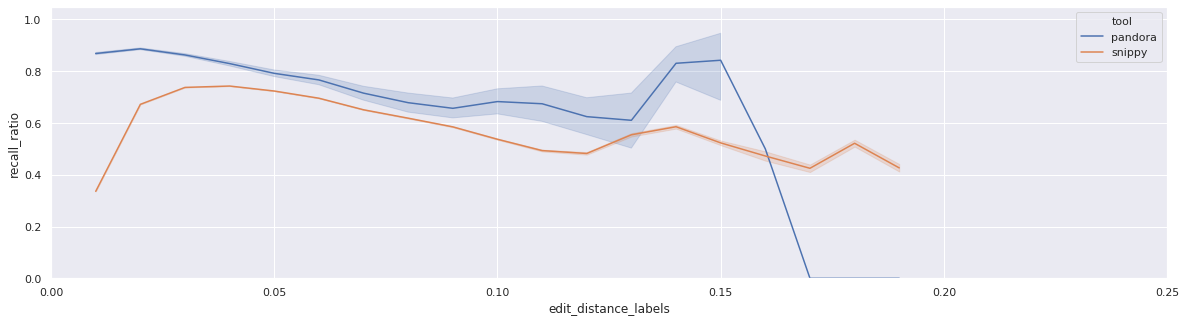

In [110]:
plot_lineplot_mean_recall_in_genes_in_several_bins(df_recall_with_step_001, step=0.01, display_plot=True)

## Number of genes in each bin

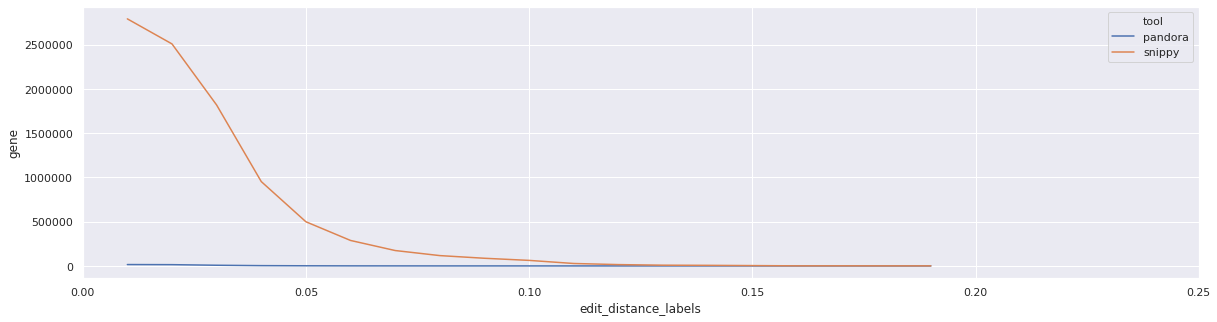

In [111]:
plot_lineplot_count_in_genes_in_several_bins(count_df_recall_with_step_001, step=0.01, display_plot=True)

### Raw counts (for debug)

In [112]:
display(count_df_recall_with_step_001)

,edit_distance_labels,tool,gene
0,0.01,pandora,15736
1,0.01,snippy,2790560
2,0.02,pandora,14514
3,0.02,snippy,2507590
4,0.03,pandora,7880
5,0.03,snippy,1817674
6,0.04,pandora,3539
7,0.04,snippy,952887
8,0.05,pandora,1807
9,0.05,snippy,499029


## Recall with 1% bins (show only until all tools have >= 50 genes):

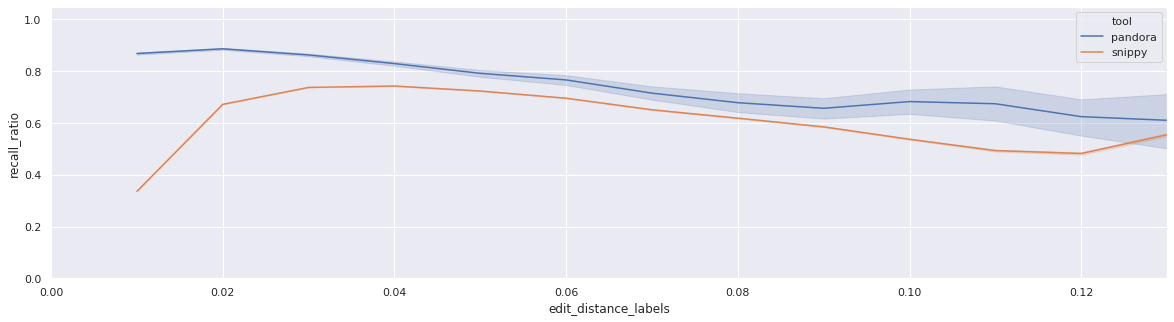

In [113]:
edit_distance_threshold_for_recall_where_all_tools_have_at_least_50_genes = \
    get_edit_distance_threshold_where_all_tools_have_at_least_the_min_nb_of_genes(
        count_df_recall_with_step_001,
        min_nb_of_genes = 50,
        nb_of_tools = 2)

plot_lineplot_mean_recall_in_genes_in_several_bins(
    df_recall_with_step_001.query("edit_distance_labels <= @edit_distance_threshold_for_recall_where_all_tools_have_at_least_50_genes"),
                                     xlim = edit_distance_threshold_for_recall_where_all_tools_have_at_least_50_genes,
                                     step=0.01, display_plot=True)

## This seems ok, but would 13 datapoints be too low? We can do this with 0.1% bins




# (SKIP - WIP) Investigating why the nb of genes between recall and precision differ

In [13]:
def merge_dfs(df_precision, df_recall):
    df = df_precision.merge(df_recall, on=["edit_distance_labels", "tool", "gene", "truth", "ref", "distance"])
    del df["gene"],df["truth"],df["ref"],df["distance"],df["max_precision"],df["observed_precision"],df["max_recall"],df["observed_recall"]
    return df

temp_df = merge_dfs(df_precision_with_step_001, df_recall_with_step_001)

In [14]:
count_df = temp_df.groupby(by=["edit_distance_labels", "tool"], as_index=False).agg({
    "precision_ratio": ["count", "mean"],
    "recall_ratio": ["mean"],
})
count_df.columns = ["edit_distance_labels", "tool", "nb of data points in bin", "mean precision in bin", "mean recall in bin"]

display(count_df)

,edit_distance_labels,tool,nb of data points in bin,mean precision in bin,mean recall in bin
0,0.01,pandora,14755,0.994517,0.892363
1,0.01,snippy,2046369,0.999983,0.454772
2,0.02,pandora,13688,0.992351,0.906501
3,0.02,snippy,2490470,0.999913,0.676546
4,0.03,pandora,7183,0.985668,0.892130
5,0.03,snippy,1804830,0.999943,0.742376
6,0.04,pandora,3099,0.982611,0.873222
7,0.04,snippy,945210,0.999899,0.748403
8,0.05,pandora,1453,0.979163,0.858400
9,0.05,snippy,494314,0.999857,0.729895


In [15]:
gene_truth_and_count_for_precision_0001 = df_precision_with_step_0001.groupby(by=["gene", "truth", "ref"]).count()
gene_truth_and_count_for_recall_0001 = df_recall_with_step_0001.groupby(by=["gene", "truth", "ref"]).count()

In [16]:
import numpy as np

def get_nb_of_genes_in_precision_and_recall(df_tool_precision, df_tool_recall, tool):
    gene_truth_and_count_for_precision = df_tool_precision.groupby(by=["gene", "truth", "ref"]).count()
    nb_points_in_precision = len(gene_truth_and_count_for_precision)
    print(f"For {tool}: Nb of (gene, truth, count) in precision: {nb_points_in_precision}")
    
    gene_truth_and_count_for_recall = df_tool_recall.groupby(by=["gene", "truth", "ref"]).count()
    nb_points_in_recall = len(gene_truth_and_count_for_recall)
    print(f"For {tool}: Nb of (gene, truth, count) in recall: {nb_points_in_recall}")

    outer_merged_df = gene_truth_and_count_for_precision.merge(gene_truth_and_count_for_recall, how="outer", on=["gene", "truth", "ref"], suffixes=("_precision", "_recall"))

    common_points = outer_merged_df.query("distance_precision.notnull() & distance_recall.notnull()", engine="python")
    nb_common_points = len(common_points)
    print(f"For {tool}: Nb of (gene, truth, count) in common: {nb_common_points}")

    points_only_in_precision = outer_merged_df.query("distance_precision.notnull() & distance_recall.isnull()", engine="python")
    nb_points_only_in_precision = len(points_only_in_precision)
    print(f"For {tool}: Nb of (gene, truth, count) only in precision: {nb_points_only_in_precision}")
    
    assert nb_common_points + nb_points_only_in_precision == nb_points_in_precision

    points_only_in_recall = outer_merged_df.query("distance_precision.isnull() & distance_recall.notnull()", engine="python")
    nb_points_only_in_recall = len(points_only_in_recall)
    print(f"For {tool}: Nb of (gene, truth, count) only in recall: {nb_points_only_in_recall}")
    
    assert nb_common_points + nb_points_only_in_recall == nb_points_in_recall

get_nb_of_genes_in_precision_and_recall(df_pandora_precision, df_pandora_recall, "pandora")
get_nb_of_genes_in_precision_and_recall(df_snippy_precision, df_snippy_recall, "snippy")

For pandora: Nb of (gene, truth, count) in precision: 24267
For pandora: Nb of (gene, truth, count) in recall: 17582
For pandora: Nb of (gene, truth, count) in common: 15929
For pandora: Nb of (gene, truth, count) only in precision: 8338
For pandora: Nb of (gene, truth, count) only in recall: 1653
For snippy: Nb of (gene, truth, count) in precision: 4219956
For snippy: Nb of (gene, truth, count) in recall: 3432680
For snippy: Nb of (gene, truth, count) in common: 3082832
For snippy: Nb of (gene, truth, count) only in precision: 1137124
For snippy: Nb of (gene, truth, count) only in recall: 349848
